In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [6]:
28 * 28

784

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
class AutoEncoder(Model):
    def __init__(self, dimension):
        super().__init__()
        self.dim = dimension   # hidden layer neurons
        self.encoder = tf.keras.Sequential([
            Flatten(),
            Dense(self.dim, activation="relu")
        ])
        
        self.decoder = Sequential([
            Dense(784, activation="sigmoid"),
            tf.keras.layers.Reshape((28,28))
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [17]:
# Number of neurons for encoder layer = 64
autoencoder = AutoEncoder(64)

In [18]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
autoencoder.fit(x_train, x_train, epochs=1, validation_data=(x_test, x_test))

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0236 - val_loss: 0.0132


In [19]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

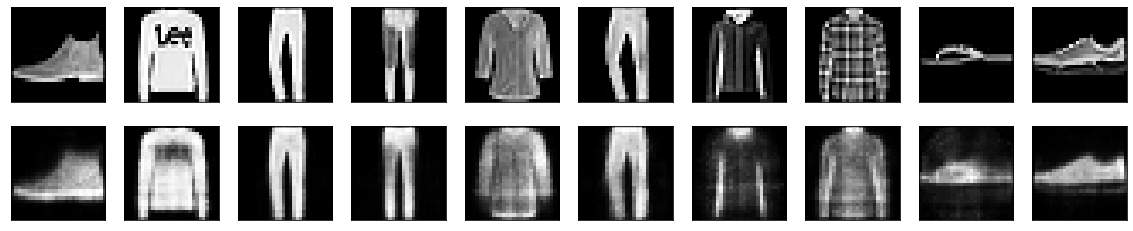

In [20]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    # ploting original image
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n+i+1)
    # ploting decoded/reconstructued image
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)